## Which skill should Data Analysts learn to maximize demand and pay?

### Methodology

1. **Calculate Skill Percentages**: Pick up from the previous notebook to find the percentage of job postings requiring each skill.
2. **Visualize Data**: Create a chart showing median salary compared to the percentage of job postings for each skill.
3. **Optional**: Check if certain technologies are more commonly used.

### Import Libraries and Data

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Clean Data

1. **Filter Data**: Create a new DataFrame, `df_DA_NL`, with only Data Analyst jobs in the Netherlands.
2. **Remove Missing Values**: Drop rows with missing values in the `salary_year_avg` column.
3. **Expand Skills**: Use the `explode` method on the `job_skills` column to create a new DataFrame, `df_DA_NL_exploded`, with a separate row for each skill.
4. **View Data**: Show the first 5 rows of the `salary_year_avg` and `job_skills` columns.

In [3]:
df_DA_NL = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Netherlands')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_NL = df_DA_NL.dropna(subset=['salary_year_avg'])

df_DA_NL_exploded = df_DA_NL.explode('job_skills')

df_DA_NL_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
13350,53014.0,sql
13350,53014.0,python
19026,155000.0,sap
134635,98500.0,sql
134635,98500.0,c#


### Calculate Skill Percentages

1. **Group and Count**: Group the data by job skills, then count and find the median salary for each skill. Sort the results by count, from highest to lowest.
2. **Rename Columns**: Change the column names for clarity.
3. **Calculate Percentages**: Determine the percentage of total Data Analyst jobs each skill represents.
4. **Filter Skills**: Remove any skills that don’t have job postings.

In [4]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_NL_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_NL)  # Find count of Data Analyst jobs in the Netherlands with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,11,89204.0,55.0
python,11,89100.0,55.0
r,7,98500.0,35.0
excel,7,89204.0,35.0
power bi,3,89100.0,15.0
tableau,3,111175.0,15.0
go,3,111175.0,15.0
looker,3,111175.0,15.0
sap,3,111175.0,15.0


### Median Salary vs. Skill Demand

- **Filter Skills**: Select Data Analyst skills that have a percentage higher than a set limit (`skill_limit`).

In [5]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

#### Create Scatter Plot

Make a scatter plot to show how the percentage of Data Analyst jobs needing specific skills relates to the median salary for those skills.

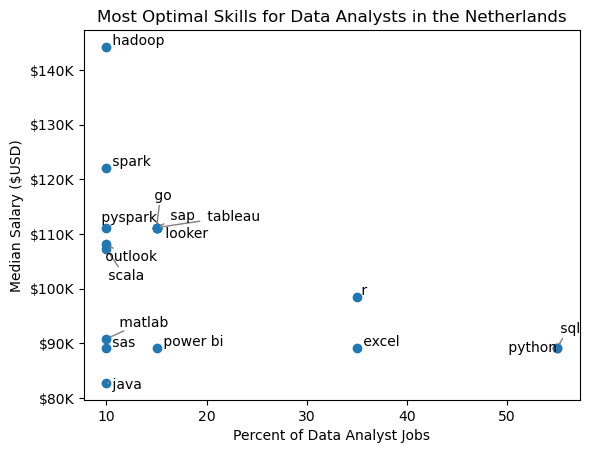

In [6]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the Netherlands')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### Bonus: Color by Technology

1. **Remove Duplicates**: Eliminate duplicate entries and rows with missing values.
2. **Combine Dictionaries**: Merge all dictionary entries into one, summing values for repeating keys.
3. **Ensure Uniqueness**: Convert values to a set to keep them unique, then back to a list.
4. **Result**: Create a dictionary where each key is a skill, and each value is a list of unique attributes for that skill.

In [7]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['ssis',
  'looker',
  'alteryx',
  'spss',
  'sheets',
  'excel',
  'nuix',
  'sas',
  'ms access',
  'outlook',
  'cognos',
  'splunk',
  'ssrs',
  'powerpoint',
  'msaccess',
  'esquisse',
  'powerbi',
  'spreadsheet',
  'power bi',
  'qlik',
  'sap',
  'microstrategy',
  'tableau',
  'datarobot',
  'word',
  'dax',
  'sharepoint',
  'visio'],
 'programming': ['swift',
  'julia',
  'dart',
  'groovy',
  'vb.net',
  'haskell',
  'typescript',
  'shell',
  'java',
  'elixir',
  'clojure',
  'r',
  'c#',
  'sas',
  'erlang',
  'php',
  'css',
  'go',
  'golang',
  'matlab',
  'ocaml',
  'lua',
  'html',
  'pascal',
  't-sql',
  'delphi',
  'javascript',
  'vba',
  'nosql',
  'visual basic',
  'objective-c',
  'ruby',
  'python',
  'bash',
  'c',
  'scala',
  'mongo',
  'perl',
  'assembly',
  'sql',
  'lisp',
  'visualbasic',
  'cobol',
  'fortran',
  'rust',
  'c++',
  'solidity',
  'kotlin',
  'no-sql',
  'sass',
  'f#',
  'mongodb',
  'crystal',
  'powershell',
  '

This code converts a dictionary into a pandas DataFrame, then explodes the 'skills' column, creating multiple rows for each 'technology' entry if it contains multiple skills.

In [8]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,ssis
0,analyst_tools,looker
0,analyst_tools,alteryx
0,analyst_tools,spss
0,analyst_tools,sheets
...,...,...
9,sync,webex
9,sync,microsoft teams
9,sync,wire
9,sync,slack


### Merge DataFrames

Combine `df_DA_skills` and `df_technology` into a new DataFrame, `df_DA_skills_tech`, by matching the `job_skills` column from `df_DA_skills` with the `skills` column from `df_technology`.

In [9]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,11,89204.0,55.0,programming,sql
1,11,89100.0,55.0,programming,python
2,7,98500.0,35.0,programming,r
3,7,89204.0,35.0,analyst_tools,excel
4,3,89100.0,15.0,analyst_tools,power bi
5,3,111175.0,15.0,analyst_tools,tableau
6,3,111175.0,15.0,programming,go
7,3,111175.0,15.0,analyst_tools,looker
8,3,111175.0,15.0,analyst_tools,sap
9,2,108087.5,10.0,analyst_tools,outlook


#### Filter High-Demand Skills

Select rows from `df_DA_skills_tech` where the `percent` column is above a set threshold, and save the results in `df_DA_skills_tech_high_demand`.

In [10]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

Plot the results in a scatter plot, coloring the points based on the 'technology' column.

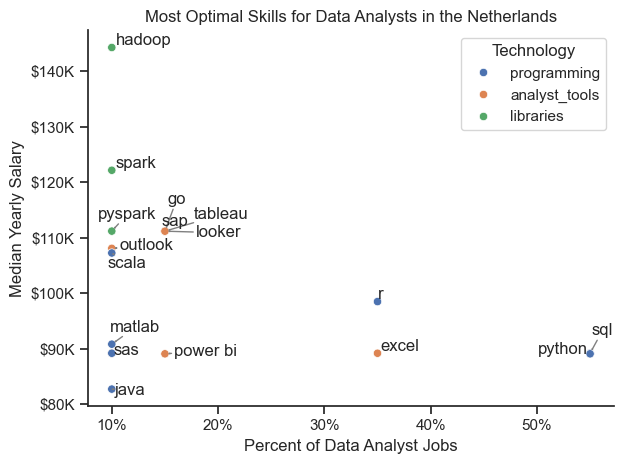

In [12]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the Netherlands')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()